In [0]:
import numpy as np
import cv2

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import PIL
from IPython.display import display

def cv2_imshow(a):
  """A replacement for cv2.imshow() for use in Jupyter notebooks."""
  a = a.clip(0, 255).astype('uint8')
  # cv2 stores colors as BGR; convert to RGB
  if a.ndim == 3:
    if a.shape[2] == 4:
      a = cv2.cvtColor(a, cv2.COLOR_BGRA2RGBA)
    else:
      a = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
  display(PIL.Image.fromarray(a))

In [0]:
cap = cv2.VideoCapture("drive/My Drive/Colab Notebooks/Kinart/videokinec_depth4.avi")
cap.set(cv2.CAP_PROP_POS_MSEC, 39500)
ret, frame = cap.read()

np.clip(frame, 0, 2**10-1, frame)
frame >>= 2
frame = frame.astype(np.uint8)


height, width = frame.shape[:2]

x1 = int(width*0.3)
x2 = int(width*0.5)
y1 = int(height*0.15)
y2 = int(height*0.4)

centerPoint = [int((x1+x2)/2), int((y1+y2)/2)]

In [0]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
gray_copy = gray.copy()



In [47]:
center_half = 15
lowerHeight = centerPoint[1] - center_half
upperHeight = centerPoint[1] + center_half 
lowerWidth = centerPoint[0] - center_half
upperWidth = centerPoint[0] + center_half
center = gray[lowerHeight:upperHeight,lowerWidth:upperWidth]
cv2_imshow(center)
# import sys
# np.set_printoptions(threshold=sys.maxsize)
# print(center)

17.0


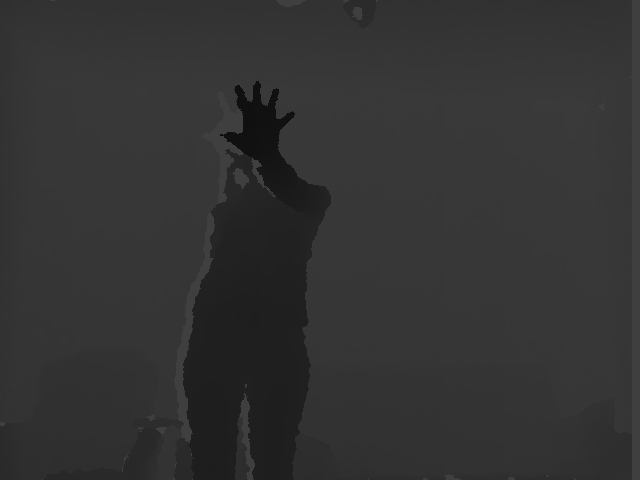

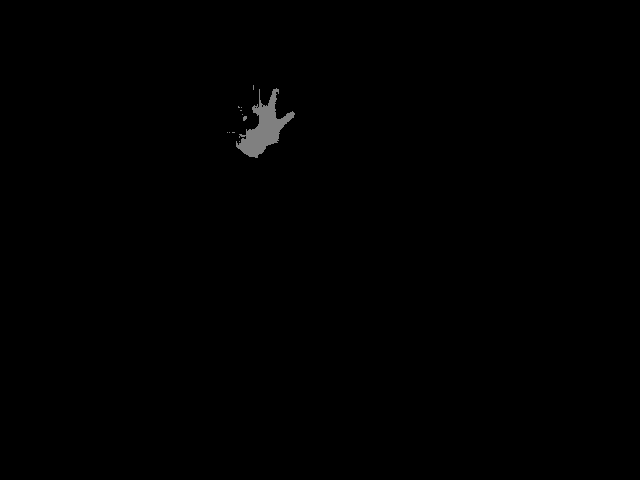

In [52]:
med_val = np.median(center)
med_condition = 5
print(med_val)
cv2_imshow(gray_copy)

gray_copy = np.where((abs(gray - int(med_val)) <= med_condition), 128, 0)
gray_copy = gray_copy.astype('uint8')

cv2_imshow(gray_copy)

GRAY
[[48 48 48 ... 63 63 63]
 [48 48 48 ... 63 63 63]
 [48 48 48 ... 63 63 63]
 ...
 [41 41 42 ... 63 63 63]
 [41 41 41 ... 63 63 63]
 [41 41 41 ... 63 63 63]]
(480, 640)
<class 'numpy.ndarray'>
uint8
------------
GRAY COPY
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(480, 640)
<class 'numpy.ndarray'>
uint8


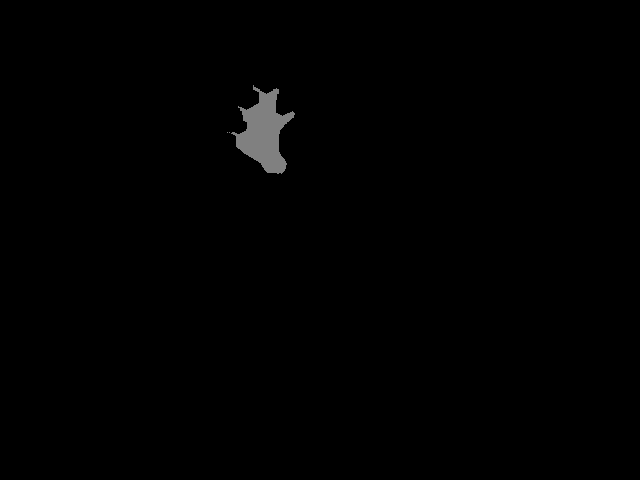

In [0]:
kernel = np.ones((5, 5), np.uint8)
print("GRAY")
print(gray)
print(gray.shape)
print(type(gray))
print(gray.dtype)

print("------------\nGRAY COPY")
print(gray_copy)
print(gray_copy.shape)
print(type(gray_copy))
print(gray_copy.dtype)

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
close = cv2.morphologyEx(gray_copy, cv2.MORPH_CLOSE, kernel, iterations=3)



cv2_imshow(close)

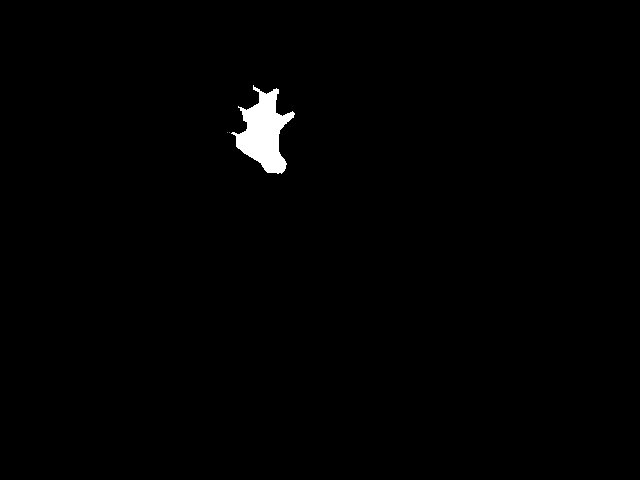

In [0]:
mask = np.zeros((height+2, width+2), np.uint8)

flood = close.copy()
cv2.floodFill(flood, mask, (centerPoint[0],centerPoint[1]), 255)

cv2_imshow(flood)

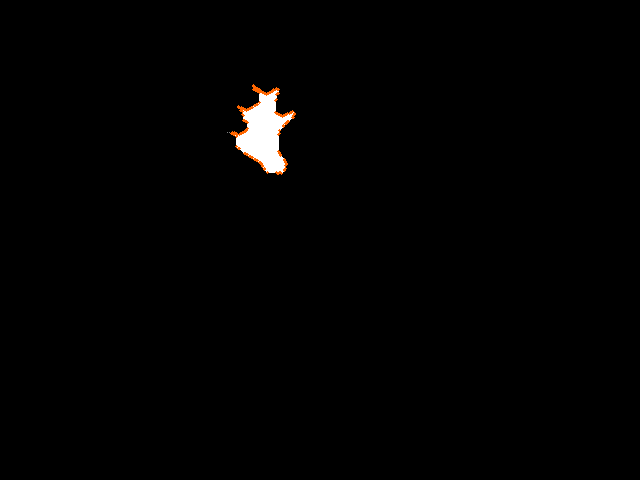

In [0]:
_, contours, hierarchy = cv2.findContours(flood, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
max_contour = max(contours, key=cv2.contourArea)

img = cv2.cvtColor(flood, cv2.COLOR_GRAY2RGB)

cv2.drawContours(img, max_contour, -1, (0,102,255), 2)
cv2_imshow(img)


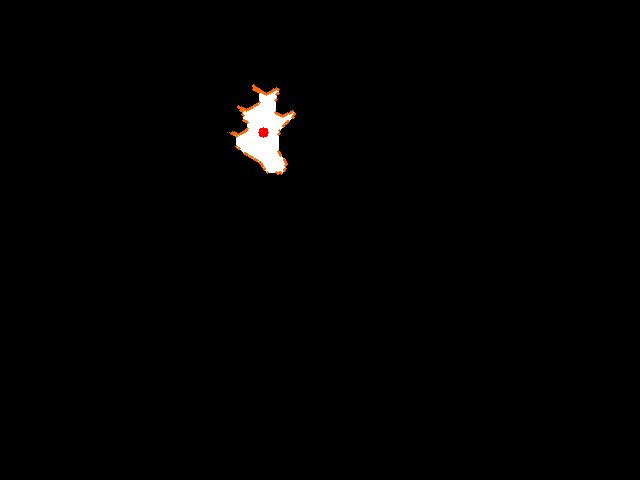

In [0]:
moment = cv2.moments(max_contour)
if moment['m00'] != 0:
  cx = int(moment['m10'] / moment['m00'])
  cy = int(moment['m01'] / moment['m00'])
  cv2.circle(img, (cx, cy), 5, (0, 0, 255), -1)

cv2_imshow(img)

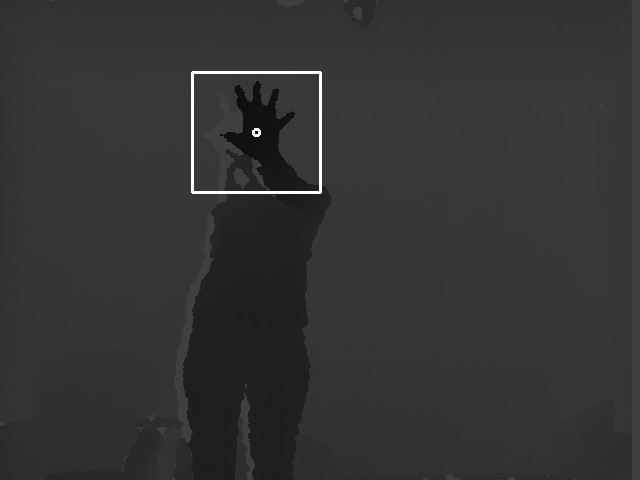

In [0]:
#color = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)
color = gray.copy()



cv2.circle(color, (int((x1+x2) /2), int((y1+y2)/2)), 3, [255, 102, 0], 2)
cv2.rectangle(color, (x1, y1), (x2, y2), [255, 102, 0], 2)

cv2_imshow(color)
cap.release()

In [0]:
!ls

drive  sample_data
